In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [24]:
dict_path = {'imdb':   'imdb_labelled.txt'}

# getting every element inside the txt file 
# and seperating them into "sentence" and "label" columns
df_list = []
for filepath in dict_path.items():
    df = pd.read_csv('imdb_labelled.txt', names=['sentence', 'label'], sep='\t')
    df_list.append(df)

df = pd.concat(df_list)
df

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [25]:
# extracting sentence and label values 
sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

# simply vectorizing every word passing through in sentences
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
vectorizer.vocabulary_

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [26]:
model = Sequential()
model.add(layers.Dense(10, input_dim = X_train.shape[1], activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/25
57/57 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5437 - val_loss: 0.6885 - val_accuracy: 0.6203
Epoch 2/25
57/57 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.8271 - val_loss: 0.6776 - val_accuracy: 0.6898
Epoch 3/25
57/57 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.8806 - val_loss: 0.6411 - val_accuracy: 0.7326
Epoch 4/25
57/57 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.9287 - val_loss: 0.6186 - val_accuracy: 0.7487
Epoch 5/25
57/57 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.9643 - val_loss: 0.5717 - val_accuracy: 0.7433
Epoch 6/25
57/57 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.9750 - val_loss: 0.5718 - val_accuracy: 0.7594
Epoch 7/25
57/57 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9840 - val_loss: 0.5190 - val_accuracy: 0.7701
Epoch 8/25
57/57 [==

In [28]:
score = model.evaluate(X_test, y_test, verbose = False)
print("score: %.2f" % (score[1]))

score: 0.79


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  

In [ ]:
model2 = Sequential()
model2.add(layers.Embedding(vocab_size, 100, input_length=100))
model2.add(layers.Conv1D(128, 5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history2 = model2.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [ ]:
score = model2.evaluate(X_test, y_test, verbose = False)
print("score: %.2f" % (score[1]))

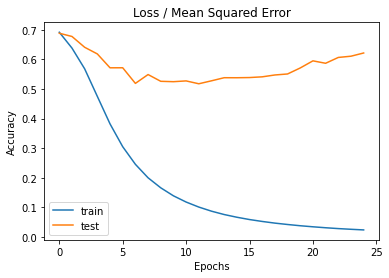

In [29]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

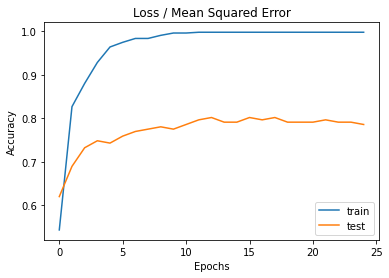

In [30]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['accuracy'], label='train')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [31]:
print(model.predict(X_test))

[[9.93590474e-01]
 [5.69496751e-02]
 [8.66398215e-03]
 [9.60836411e-01]
 [4.89881933e-02]
 [2.06147164e-01]
 [5.26125669e-01]
 [4.29839373e-01]
 [8.82587075e-01]
 [6.18548989e-02]
 [9.93236899e-01]
 [2.29502380e-01]
 [7.27515817e-02]
 [1.32190883e-02]
 [4.93658185e-02]
 [5.04518509e-01]
 [4.65498775e-01]
 [1.26280189e-02]
 [2.74098933e-01]
 [4.88019347e-01]
 [1.58467263e-01]
 [9.72142339e-01]
 [6.06912971e-01]
 [8.42376947e-01]
 [8.79043221e-01]
 [8.33364487e-01]
 [8.62276018e-01]
 [8.48481476e-01]
 [9.99487758e-01]
 [4.12473679e-02]
 [3.35781872e-02]
 [2.20925212e-01]
 [9.70773160e-01]
 [9.79315698e-01]
 [5.58750331e-02]
 [9.56303179e-01]
 [7.89010584e-01]
 [2.79010922e-01]
 [3.13301384e-01]
 [5.06669879e-01]
 [2.94085175e-01]
 [9.86380100e-01]
 [1.53013140e-01]
 [1.21539235e-02]
 [9.82366443e-01]
 [3.11607659e-01]
 [4.29761231e-01]
 [3.61435801e-01]
 [6.47452056e-01]
 [7.34766006e-01]
 [9.53533053e-01]
 [2.75528342e-01]
 [1.16913974e-01]
 [2.84668267e-01]
 [1.01649761e-03]
 [4.457718